# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #Worked with Rhythm Ahir from BCS to understand URL
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | lucapa
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | selfoss
Processing Record 6 of Set 1 | sandnessjoen
Processing Record 7 of Set 1 | acajutla
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of

Processing Record 40 of Set 4 | jaicos
Processing Record 41 of Set 4 | blackwater
Processing Record 42 of Set 4 | gizo
Processing Record 43 of Set 4 | am timan
Processing Record 44 of Set 4 | klaksvik
Processing Record 45 of Set 4 | port alfred
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | damongo
City not found. Skipping...
Processing Record 48 of Set 4 | quellon
Processing Record 49 of Set 4 | tambura
Processing Record 0 of Set 5 | hermanus
Processing Record 1 of Set 5 | daruvar
Processing Record 2 of Set 5 | ballina
Processing Record 3 of Set 5 | arkalyk
Processing Record 4 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 5 of Set 5 | maceio
Processing Record 6 of Set 5 | velasco ibarra
Processing Record 7 of Set 5 | sinabang
Processing Record 8 of Set 5 | kilinochchi
Processing Record 9 of Set 5 | port glaud
City not found. Skipping...
Processing Record 10 of Set 5 | eureka
Processing Record 11 of Set 5 | port isabel
Processing Record 12 o

Processing Record 32 of Set 8 | callao
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | makurazaki
Processing Record 36 of Set 8 | adre
Processing Record 37 of Set 8 | bamboo flat
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | bikenibeu village
Processing Record 40 of Set 8 | serenje
Processing Record 41 of Set 8 | kishtwar
Processing Record 42 of Set 8 | kyzylorda
Processing Record 43 of Set 8 | mukah
City not found. Skipping...
Processing Record 44 of Set 8 | general mosconi
Processing Record 45 of Set 8 | bridgewater
Processing Record 46 of Set 8 | tidjikja
Processing Record 47 of Set 8 | katsuren-haebaru
Processing Record 48 of Set 8 | kirensk
Processing Record 49 of Set 8 | port macquarie
Processing Record 0 of Set 9 | fortuna
Processing Record 1 of Set 9 | margate
Processing Record 2 of Set 9 | axim
Processing Record 3 of Set 9 | minas de matahambre
City not found. Skipping...
Processing Rec

Processing Record 19 of Set 12 | ust'-kulom
Processing Record 20 of Set 12 | antsirabe afovoany
City not found. Skipping...
Processing Record 21 of Set 12 | gornji vakuf
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | de aar
Processing Record 24 of Set 12 | cape town
Processing Record 25 of Set 12 | luau
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | sindi
Processing Record 28 of Set 12 | francisco sa
Processing Record 29 of Set 12 | honolulu
Processing Record 30 of Set 12 | zheleznodorozhnyy
Processing Record 31 of Set 12 | rokytne
Processing Record 32 of Set 12 | puerto francisco de orellana
Processing Record 33 of Set 12 | neiafu
Processing Record 34 of Set 12 | saue
Processing Record 35 of Set 12 | sarpol-e zahab
Processing Record 36 of Set 12 | aripuana
Processing Record 37 of Set 12 | syktyvkar
Processing Record 38 of Set 12 | gaiman
Processing Record 39 of Set 12 | turaif
Processing Record 40 of Set 12 | cromer
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.25,49,75,8.75,CL,1698601245
1,lucapa,-8.4192,20.7447,23.41,72,72,1.35,AO,1698601319
2,puerto ayora,-0.7393,-90.3518,29.98,85,22,4.92,EC,1698601237
3,stanley,54.8680,-1.6985,8.77,95,75,3.60,GB,1698601408
4,selfoss,63.9331,-20.9971,0.58,69,18,2.54,IS,1698601267


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,49,75,8.75,CL,1698601245
1,lucapa,-8.4192,20.7447,23.41,72,72,1.35,AO,1698601319
2,puerto ayora,-0.7393,-90.3518,29.98,85,22,4.92,EC,1698601237
3,stanley,54.8680,-1.6985,8.77,95,75,3.60,GB,1698601408
4,selfoss,63.9331,-20.9971,0.58,69,18,2.54,IS,1698601267


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

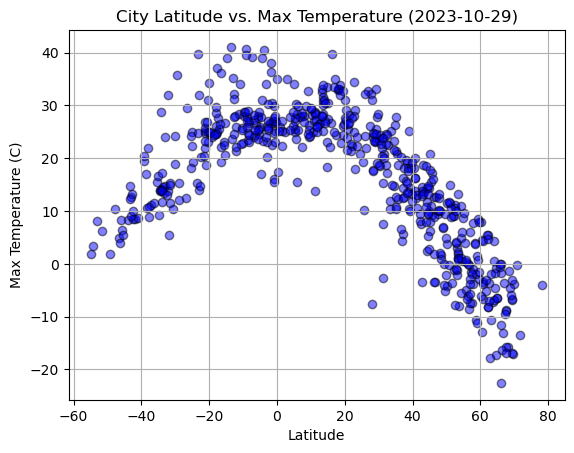

In [8]:
# Build scatter plot for latitude vs. temperature
# https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

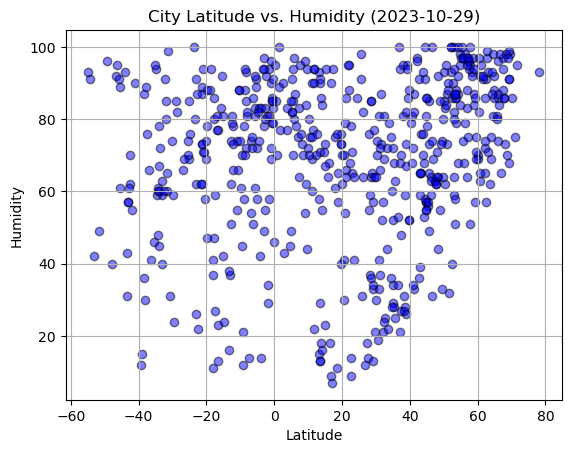

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("City Latitude vs. Humidity (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

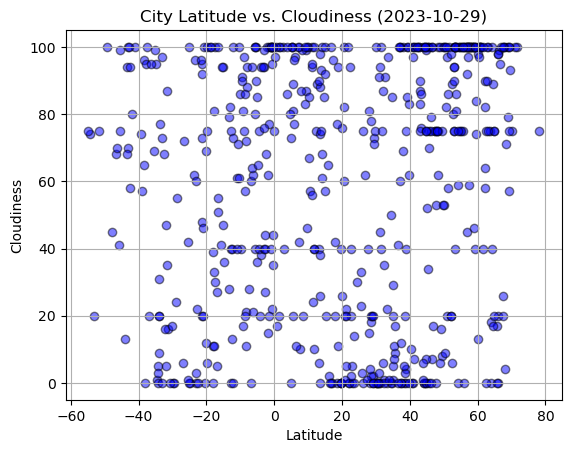

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("City Latitude vs. Cloudiness (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

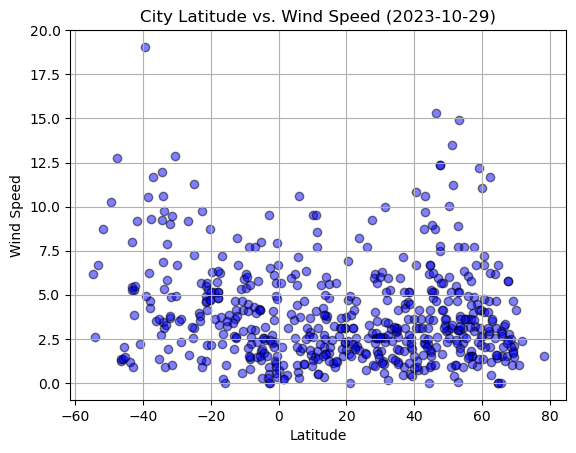

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.title("City Latitude vs. Wind Speed (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def LinearRegressionLine(x_value,y_value):
    x = x_value
    y = y_value
    
    lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(x, y)
    lat_fit = lat_slope * x + lat_int
    
    print(f"The r value is: {lat_r}")
    plt.plot(x,lat_fit,"-",color='r')
    
    line_eq = "y = " + str(round(lat_slope,2)) + "x + " + str(round(lat_int,2))
    return line_eq
    

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,stanley,54.8680,-1.6985,8.77,95,75,3.60,GB,1698601408
4,selfoss,63.9331,-20.9971,0.58,69,18,2.54,IS,1698601267
5,sandnessjoen,66.0217,12.6316,-1.71,86,20,1.54,NO,1698601409
6,acajutla,13.5928,-89.8275,28.45,71,98,2.47,SV,1698601409
9,isafjordur,66.0755,-23.1240,0.02,74,0,2.06,IS,1698601409


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.25,49,75,8.75,CL,1698601245
1,lucapa,-8.4192,20.7447,23.41,72,72,1.35,AO,1698601319
2,puerto ayora,-0.7393,-90.3518,29.98,85,22,4.92,EC,1698601237
7,vila velha,-20.3297,-40.2925,30.97,58,0,8.75,BR,1698601328
8,avarua,-21.2078,-159.7750,22.03,73,95,4.12,CK,1698601409


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8793210578090969


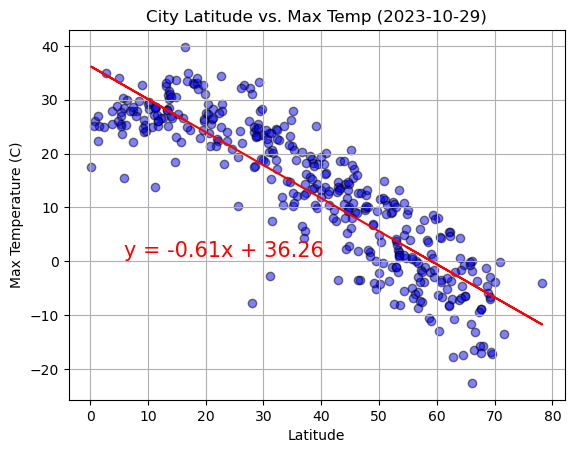

In [34]:
# Linear regression on Northern Hemisphere
y_variable = "Max Temp"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable]),(5.8,0.8),fontsize=15,color="red")

# Show plot
plt.show()

The r value is: 0.7399166139723368


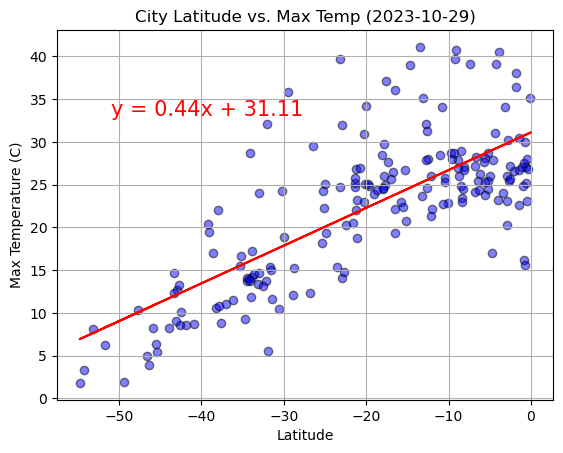

In [36]:
# Linear regression on Southern Hemisphere
y_variable = "Max Temp"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable]),(-51,33),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear correlation between latitude and temperature is positive, and has a strong to very strong correlation. According to the r-value, if you are close to 0, you have a great chance in being in a warmer city.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.27658928877047906


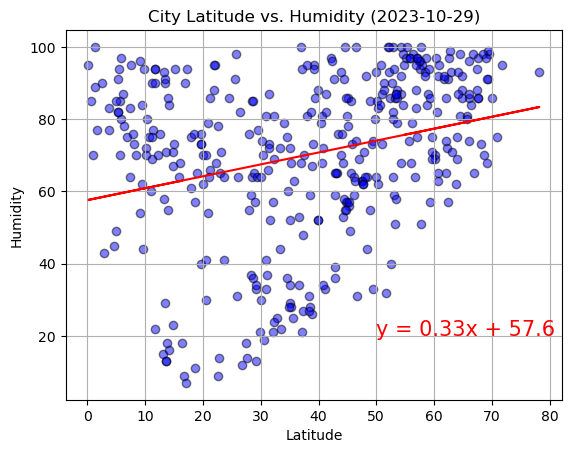

In [38]:
# Northern Hemisphere
y_variable = "Humidity"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable]),(50,20),fontsize=15,color="red")

# Show plot
plt.show()

The r value is: 0.09501738720309635


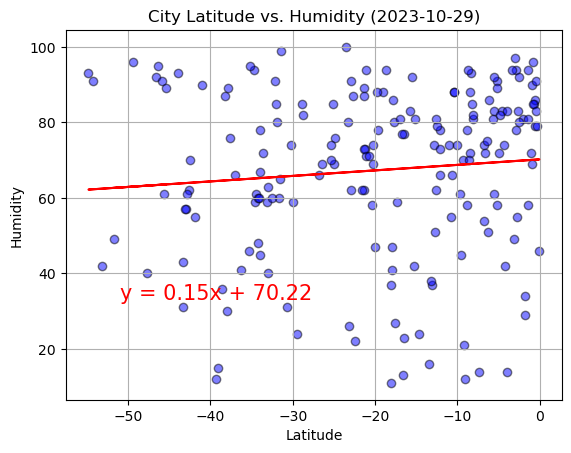

In [39]:
# Southern Hemisphere
y_variable = "Humidity"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable]),(-51,33),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation between latitude and humidity seem to be very weak to weak. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.17564622524119372


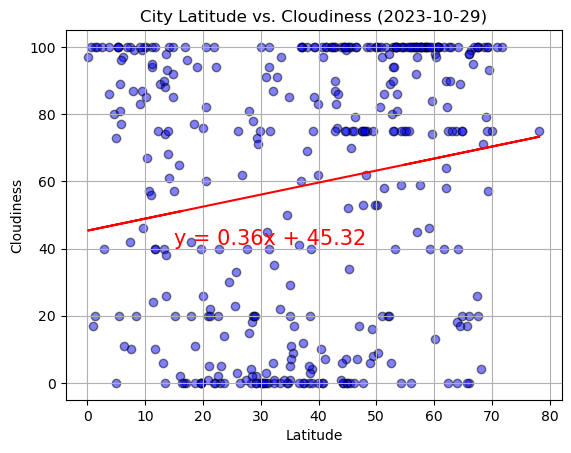

In [41]:
# Northern Hemisphere
y_variable = "Cloudiness"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable]),(15,41),fontsize=15,color="red")


# Show plot
plt.show()

The r value is: 0.08228067523149388


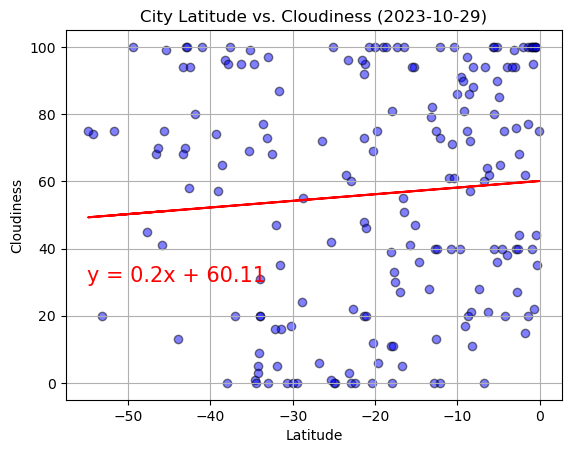

In [42]:
# Southern Hemisphere
y_variable = "Cloudiness"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable]),(-55,30),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and latitude. Latitude and cloudiness seem not to be related. There are only a few values that are not 0 or 100.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.08589548518041275


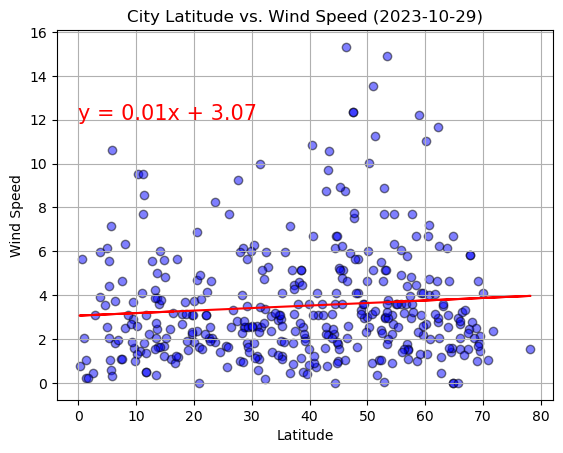

In [43]:
# Northern Hemisphere
y_variable = "Wind Speed"

plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df[y_variable]),(0,12),fontsize=15,color="red")

# Show plot
plt.show()

The r value is: -0.3275193239828381


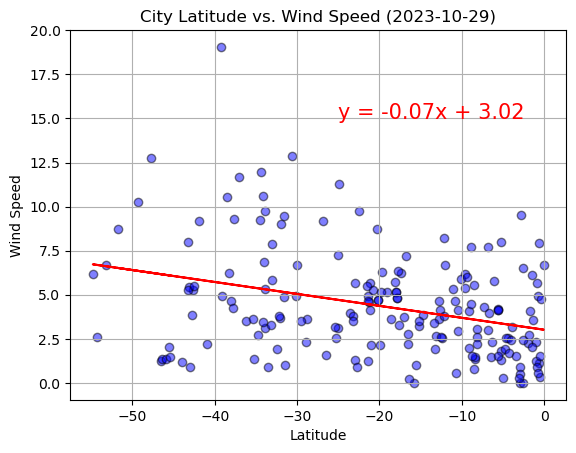

In [44]:
# Southern Hemisphere
y_variable = "Wind Speed"

plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df[y_variable],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel(y_variable)
plt.grid()
plt.title("City Latitude vs. "+ y_variable +" (" + date.today().isoformat() + ")")

plt.annotate(LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df[y_variable]),(-25,15),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak negative, to weak correlation between wind speed and latitude. Because the northern hemisphere has a positive weak correlation, and the southern has a negative weak correlation, other factors need to be considered, like the season these cities are in.